In [ ]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  intercept = np.ones((features_X.shape[0], 1))
  features_X = np.concatenate((intercept, features_X), axis=1)
  return features_X, sales_Y


In [ ]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [ ]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [ ]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = [generate_random_value() for _ in range(n)]
    return individual

In [ ]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [ ]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)
    return fitness

In [ ]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [ ]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()


    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

In [ ]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [ ]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [ ]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [ ]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [ ]:
population = initializePopulation(100)
print(len(population))

100


In [ ]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [ ]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-1.7707102346493941, -0.44255615074371035, -1.7485653418675173, -4.711708834619053]


In [ ]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m) # duplication

        # crossover
        individual_t1, individual_t2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_t1)
        individual_m2 = mutate(individual_t2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_loss(sorted_population[m-1])

In [ ]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [ ]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, losses = create_new_population(population, 2, i)
    losses_list.append(losses)
  return losses_list, population


In [ ]:
losses_list, population = run_GA()

Best loss: 1612.8871692548762 with chromsome:  [-2.508937270052418, 0.24330570586657774, -0.9321777241744456, -0.7599131761265054]
Best loss: 1612.8871692548762 with chromsome:  [-2.508937270052418, 0.24330570586657774, -0.9321777241744456, -0.7599131761265054]
Best loss: 662.5657658581678 with chromsome:  [0.903161669007726, 0.14077726285031678, 1.3184100714179903, -1.1157017788634116]
Best loss: 401.7749041680862 with chromsome:  [-4.2244868641971856, 0.12038655676975485, 1.2187140304254362, -0.7759625443690799]
Best loss: 401.7749041680862 with chromsome:  [-4.2244868641971856, 0.12038655676975485, 1.2187140304254362, -0.7759625443690799]
Best loss: 401.7749041680862 with chromsome:  [-4.2244868641971856, 0.12038655676975485, 1.2187140304254362, -0.7759625443690799]
Best loss: 87.09664501612905 with chromsome:  [0.903161669007726, 0.14077726285031678, 0.09968186195173367, -0.1263204880927027]
Best loss: 87.09664501612905 with chromsome:  [0.903161669007726, 0.14077726285031678, 0.09

Best loss: 958.2369856654408 with chromsome:  [0.3946019745143925, 0.2257735319929821, 1.2305906530652466, -1.1926142068144274]
Best loss: 434.0164806665843 with chromsome:  [-3.8461302251768426, -0.08434148140809006, 0.4382694888578553, 0.17615427517233995]
Best loss: 171.28358422519472 with chromsome:  [1.0320696526432216, 0.0028433882876499617, 0.3721341967215708, -0.2030981075344629]
Best loss: 171.28358422519472 with chromsome:  [1.0320696526432216, 0.0028433882876499617, 0.3721341967215708, -0.2030981075344629]
Best loss: 104.14449371968902 with chromsome:  [-3.7634587193420757, -0.010306776677007079, 0.4107215633082695, 0.24498516864868813]
Best loss: 88.77391811317186 with chromsome:  [4.520527981005226, 0.0028433882876499617, 0.4382694888578553, -0.2030981075344629]
Best loss: 88.77391811317186 with chromsome:  [4.520527981005226, 0.0028433882876499617, 0.4382694888578553, -0.2030981075344629]
Best loss: 46.84254466389922 with chromsome:  [4.627359862443861, 0.0028433882876499

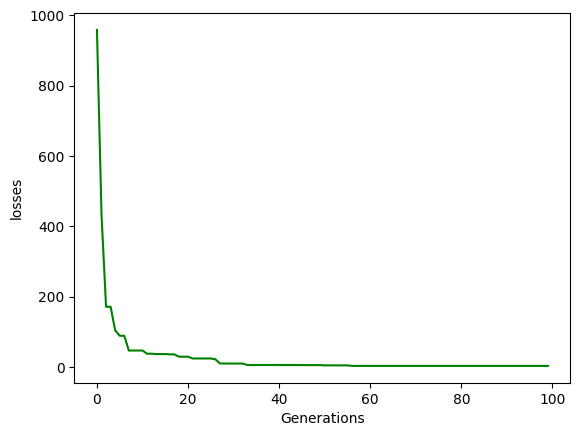

In [ ]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  plt.plot(losses_list, c='green')
  plt.xlabel('Generations')
  plt.ylabel('losses')
  plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

[4.764733729575838, 0.050481493838613334, 0.09434155583628812, 0.026234515757947996]


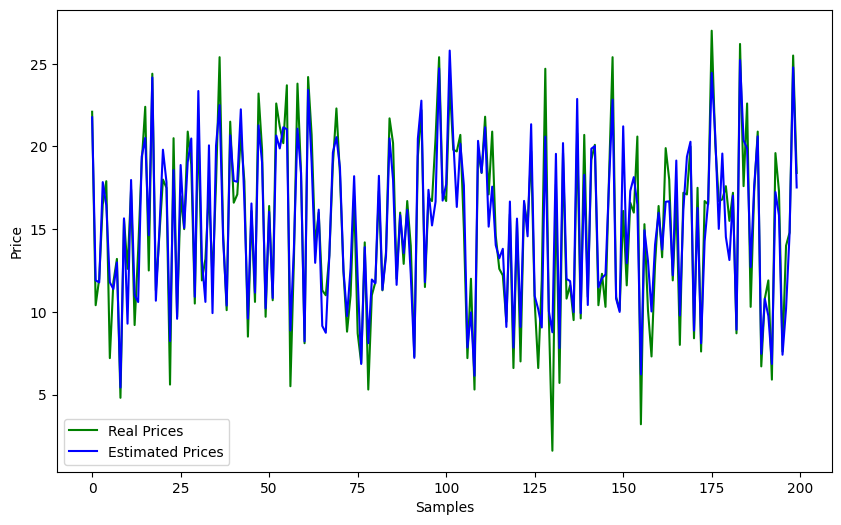

In [ ]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
      estimated_price = sum(c*x for x, c in zip(feature, theta))
      estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[4.764733729575838, 0.050481493838613334, 0.09434155583628812, 0.026234515757947996]


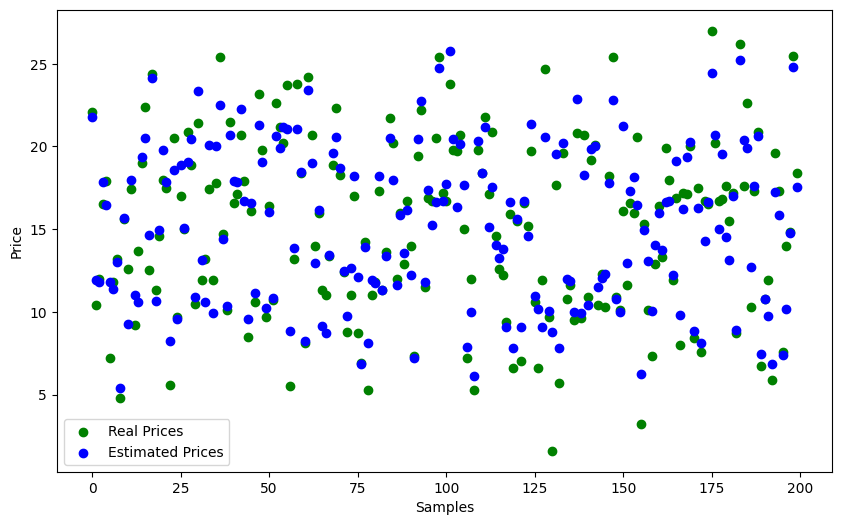

In [ ]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()